In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wehrley/Kaggle-Digit-Recognizer/master/train.csv')

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df.shape

(42000, 785)

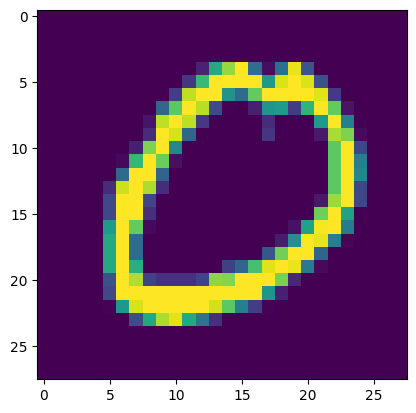

In [5]:
# 28*28=784
plt.imshow(df.iloc[13051, 1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

In [9]:
df.isnull().sum().mean()

0.0

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

7.670691728591919


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
# Applying PCA

In [16]:
# Step 1: Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
# PCA
from sklearn.decomposition import PCA
#Top 100 principal components
pca = PCA(n_components=100)

In [19]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 100)

In [21]:
knn =KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
ypred = knn.predict(X_test_trf)

In [22]:
accuracy_score(y_test, ypred)

0.9546428571428571

In [23]:
# Accuracy with 784 columns = 0.9648809523809524
# Accuracy with 100 columns = 0.954047619047619

In [24]:
# # Iterate over different numbers of principal components from 1 to 784
# for i in range(1,785):
#     # Instantiate PCA with the current number of principal components
#     pca = PCA(n_components=i)
    
#     # Fit and transform the training data to the reduced dimensionality
#     X_train_trf = pca.fit_transform(X_train)
    
#     # Transform the test data using the same PCA
#     X_test_trf = pca.transform(X_test)
    
#     # Instantiate a K-Nearest Neighbors classifier
#     knn = KNeighborsClassifier()
    
#     # Fit the classifier to the transformed training data
#     knn.fit(X_train_trf,y_train)
    
#     # Predict labels for the transformed test data
#     y_pred = knn.predict(X_test_trf)
    
#     # Print the accuracy score for the current configuration
#     print(accuracy_score(y_test,y_pred))

In [25]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
import plotly.express as px

In [36]:
y_train_trf =  y_train.astype(str)
fig = px.scatter(x = X_train_trf[:, 0],
                y = X_train_trf[:,1],
                color=y_train_trf)

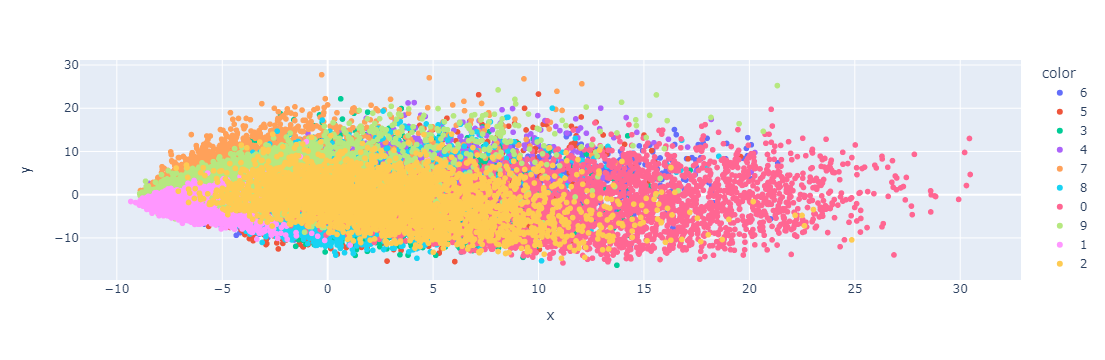

In [37]:
fig.show()

In [39]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [40]:
X_train_trf

array([[-2.71862612, -0.48947458,  1.13595027],
       [-0.67700158, -6.75376466, -2.33750177],
       [-3.0332237 ,  6.5096236 ,  7.49249752],
       ...,
       [ 2.14884862,  0.78067512, -0.74754969],
       [ 1.05958486,  0.94821208,  3.95088864],
       [17.7025872 ,  1.96218443, -4.94328828]])

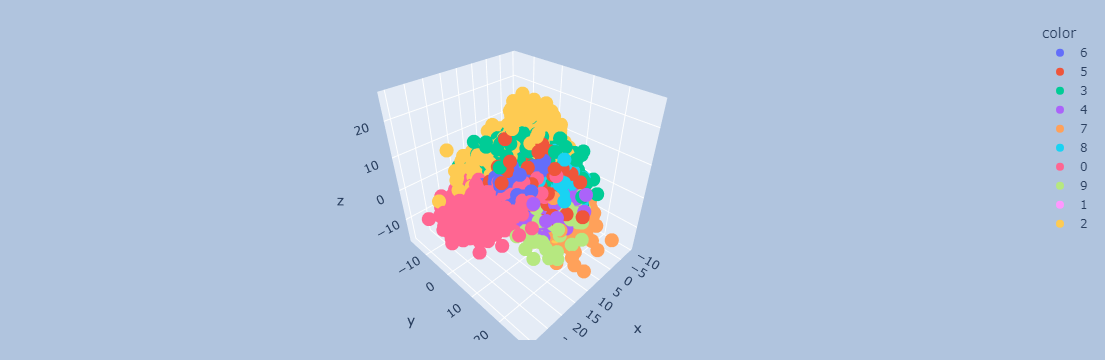

In [41]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [44]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023398, 26.74459584])

In [47]:
pca.components_
# Eigen vectors

array([[ 1.33400402e-19, -1.13028013e-18, -9.51591687e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.02822338e-17,  8.98280276e-18, -3.59405073e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.20781950e-17,  2.53991218e-17,  6.20980678e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [45]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [46]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [48]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [49]:
pca.explained_variance_.shape

(784,)

In [50]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [55]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [51]:
pca.components_

array([[-1.50074992e-19, -8.32667268e-17,  2.77555756e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -3.46944695e-18,  6.93889390e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20,  6.93889390e-18, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00, -1.76944931e-02, -5.18591218e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.24602065e-01, -1.42297071e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  6.18224022e-02,  1.25592580e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [52]:
pca.components_.shape

(784, 784)

In [56]:
#np.cumsum() is a NumPy function that computes the cumulative sum of elements along a given axis. Here's what it does:

# It takes an array as input.
# It returns an array where each element is the cumulative sum of the elements up to that index in the original array.
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

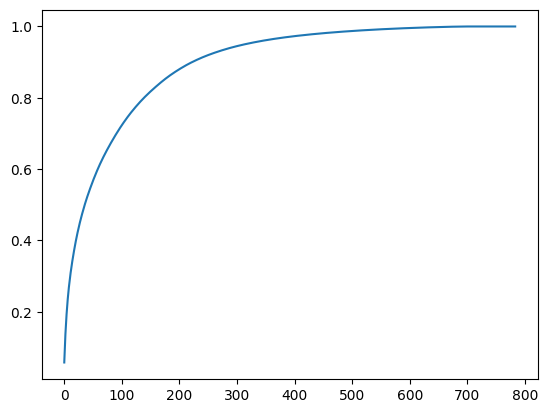

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Principal Component Analysis (PCA) may not work well or may not be suitable for certain scenarios due to various reasons:

1. **Linear Assumption**: PCA assumes linear relationships between variables. If the underlying data relationships are highly non-linear, PCA may not capture the important features or structure of the data effectively.

2. **Outliers**: PCA is sensitive to outliers since it aims to maximize variance. Outliers can significantly affect the principal components, leading to poor representation of the data.

3. **Equal Variance Assumption**: PCA assumes that variables have equal variance. If variables have significantly different variances, PCA may not effectively capture the underlying structure of the data.

4. **Non-Gaussian Data**: PCA assumes that the data follows a Gaussian distribution. If the data distribution is highly non-Gaussian or has heavy tails, PCA may not work well.

5. **Categorical Data**: PCA is primarily designed for continuous numerical data. It may not be appropriate for categorical or ordinal data unless properly preprocessed (e.g., one-hot encoding).

6. **High-Dimensional Data**: In very high-dimensional datasets, the computational complexity of PCA increases significantly. Moreover, interpreting the results of PCA in high-dimensional spaces can be challenging.

7. **Interpretability**: While PCA provides a dimensionality reduction by transforming variables into principal components, the interpretability of these components may be difficult, especially when dealing with a large number of components.

8. **Small Sample Size**: When the sample size is small, PCA estimates may be unreliable, leading to poor representation of the data.

In summary, PCA may not work effectively in scenarios where its underlying assumptions are violated, such as non-linear relationships, presence of outliers, unequal variances, non-Gaussian distributions, categorical data, high-dimensional spaces, small sample sizes, or when interpretability is critical. In such cases, alternative dimensionality reduction techniques or data preprocessing methods may be more appropriate.

![](https://i.stack.imgur.com/FtQsj.png)